<b>
Name : Anish Rajesh Adnani
<br>
USC ID : 4092610491
<br>
USC Email ID : adnani@usc.edu
<br>
Github Username : midnightbot
<br>
    </b>

<b> 1. The dataset contains data points collected from a Combined Cycle Power Plant over
6 years (2006-2011), when the power plant was set to work with full load. Features
consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP),
Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical
energy output (EP) of the plant </b>


In [1]:
## Basic imports
import pandas as pd  ## reading the data
import openpyxl  ## Optional dependency for reading excel using pandas
import seaborn as sns  ## used for data visualization
import matplotlib.pyplot as plt  ## used for plotting
import numpy as np  ## np array used for plotting plots
from sklearn.linear_model import LinearRegression ## used for simple linear regression
import statsmodels.api as sm  ## model summary for linear regression
from sklearn.model_selection import train_test_split  ## for splitting data into train and test set
from sklearn.preprocessing import PolynomialFeatures  ## for polynomial regression
from sklearn.metrics import mean_squared_error  ## used for calculating Mean Squared Error
from sklearn import preprocessing  ## used for data preprocessing
from sklearn.neighbors import KNeighborsRegressor  ## used for KNN
%matplotlib inline

<b> 1.(a) Download the Combined Cycle Power Plant data
1
from https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant </b>

In [2]:
data_location = "../data/CCPP/Folds5x2_pp.xlsx"

In [3]:
data = pd.read_excel(data_location)
data.head(5)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


<b> 1.(b) Exploring the data: </b>

<b> 1.(b).(i) How many rows are in this data set? How many columns? What do the rows
and columns represent? </b>

In [4]:
print(data.shape)
print("Number of Rows in the dataset ==> " ,data.shape[0])
print("Number of Columns in the dataset ==> " ,data.shape[1])
print("Rows represent Datapoints")
print("Columns represent Features")

(9568, 5)
Number of Rows in the dataset ==>  9568
Number of Columns in the dataset ==>  5
Rows represent Datapoints
Columns represent Features


<b> 1.(b).(ii) Make pairwise scatterplots of all the varianbles in the data set including the
predictors (independent variables) with the dependent variable. Describe
yourfindings. </b>


In [5]:
var = list(data.columns)
print(var)

['AT', 'V', 'AP', 'RH', 'PE']


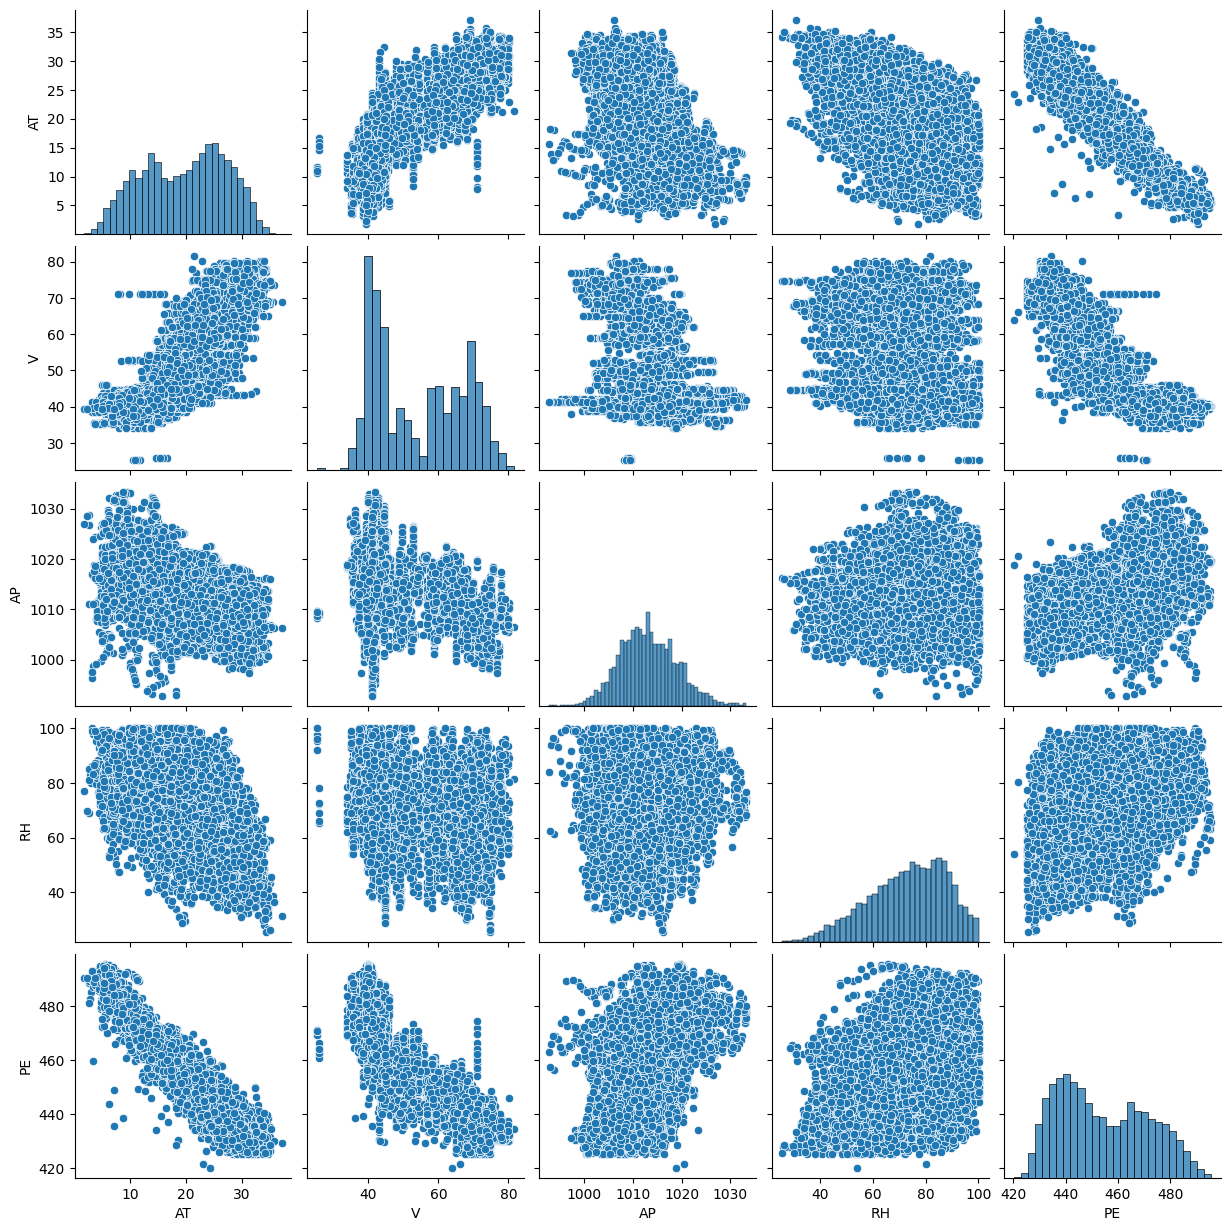

In [6]:
sns.pairplot(data)

In [7]:
print("Below are my findings")
print("Strong Linear Relation ==> AT and PE")
print("Strong Linear Relation ==> V and PE")

Below are my findings
Strong Linear Relation ==> AT and PE
Strong Linear Relation ==> V and PE


<b> (iii) What are the mean, the median, range, first and third quartiles, and in-
terquartile ranges of each of the variables in the dataset? Summarize them
in a table. </b>

In [8]:
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [9]:
data_mean = data.mean()
data_median = data.median()
data_range = data.max() - data.min()
data_first_quartile = data.quantile(0.25)
data_third_quartile = data.quantile(0.75)
data_inter_quartile = data_third_quartile - data_first_quartile

In [10]:
data_summary_df = pd.concat([data_mean, data_median, data_range, data_first_quartile, data_third_quartile, data_inter_quartile], axis = 1)

In [11]:
data_summary_df.columns = ['mean', 'median', 'range', 'First Quartile', 'Third Quartile', 'Inter Quartile']
data_summary_df

,mean,median,range,First Quartile,Third Quartile,Inter Quartile
AT,19.651231,20.345,35.30,13.5100,25.72,12.2100
V,54.305804,52.080,56.20,41.7400,66.54,24.8000
AP,1013.259078,1012.940,40.41,1009.1000,1017.26,8.1600
RH,73.308978,74.975,74.60,63.3275,84.83,21.5025
PE,454.365009,451.550,75.50,439.7500,468.43,28.6800


<b> 1.(c) For each predictor, fit a simple linear regression model to predict the response.
Describe your results. In which of the models is there a statistically significant
association between the predictor and the response? Create some plots to back
up your assertions. Are there any outliers that you would like to remove from
your data for each of these regression tasks? </b>

In [12]:
lr_train_y = data['PE']

In [13]:
def fit_linear_regression(feature):
    """
    Fits Linear Regression Model using 'feature' predictor and 'PE' as predictor
    Parameters : feature (Predictor for which Linear Regression is to be performed)
    Return : Linear Regression Coefficient
    """
    linear_regression = LinearRegression()
    model = linear_regression.fit(data[[feature]], lr_train_y)
    return linear_regression.coef_

In [14]:
print(var)
lr_coeff = {}
for fts in var[:-1]:
    lr_coeff[fts] = fit_linear_regression(fts)[0]
    
print(lr_coeff)

['AT', 'V', 'AP', 'RH', 'PE']
{'AT': -2.171319958517783, 'V': -1.1681351265557012, 'AP': 1.4898716733991106, 'RH': 0.455650102262982}


In [15]:
def stats_model_linear_regression(feature):
    """
    Prints the statistical data of linear regression fit using 'feature' predictor to predict 'PE'
    Parameters : feature
    Return : -
    """
    model = sm.OLS(lr_train_y, sm.add_constant(data[[feature]])).fit()
    print(model.summary())

In [16]:
for fts in var[:-1]:
    print("********************************************************************************************************")
    print("Model Summary")
    print("Linear Regression for ", fts , "vs PE")
    stats_model_linear_regression(fts)
    print("********************************************************************************************************")

********************************************************************************************************
Model Summary
Linear Regression for  AT vs PE
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:48:53   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|     

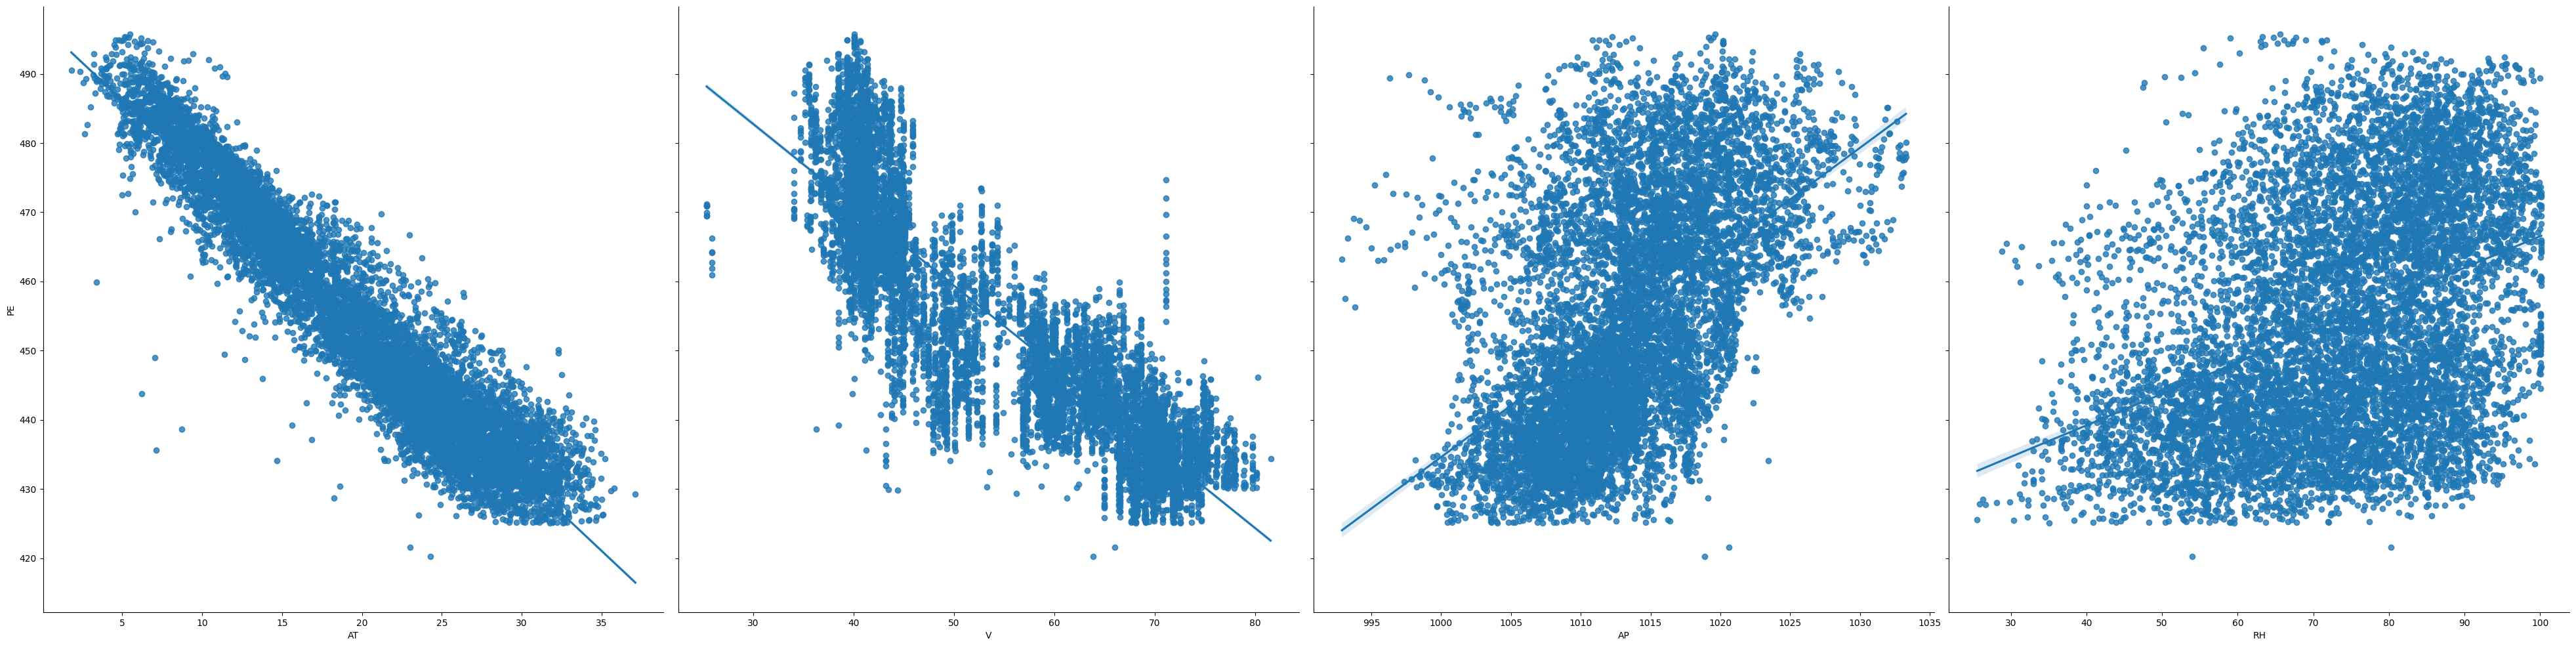

In [17]:
sns.pairplot(data, x_vars = var[:-1], y_vars = "PE", height = 10 ,kind = 'reg')

In [18]:
print("All Models show significant statistic association between predictor and response")
print("All predictors have near zero p-values hence supporting the above claim")
print("Yes there are outliers, removing them will yield better regression model")

All Models show significant statistic association between predictor and response
All predictors have near zero p-values hence supporting the above claim
Yes there are outliers, removing them will yield better regression model


<b> 1.(d) Fit a multiple regression model to predict the response using all of the predictors.
Describe your results. For which predictors can we reject the null hypothesis
H
0
:
β
j
= 0? </b>

In [19]:
print(var)

['AT', 'V', 'AP', 'RH', 'PE']


In [20]:
def print_curve(coefficients, intercept):
    """
    Prints the Regression Curve
    Parameters : coefficients(coefficients of all the predictor)
                 intercept
    Return : -
    """
    str_model = ""
    for x in range(len(coefficients)):
        str_model+=str(coefficients[x]) + "*" + "(" + var[x] + ")" + " "
        
    if intercept > 0:    
        str_model+= "+ " + str(intercept)
    else:
        str_model+= str(intercept)
    print(str_model)
    print("\n")

In [21]:
def multiple_regression_model():
    """
    Performs Linear Regression for all the predictors
    Parameters : -
    Return : Coefficients of all the predictors
    """
    X = data[var[:-1]]
    Y = data['PE']
    multi_regression_train_x, multi_regression_test_x, multi_regression_train_y, multi_regression_test_y = train_test_split(X,Y,random_state=42,test_size=0.2)
    multi_regression = LinearRegression()
    multi_model = multi_regression.fit(multi_regression_train_x, multi_regression_train_y)
    multi_model_score = multi_regression.score(multi_regression_test_x, multi_regression_test_y)
    print("Model Type ==> ", multi_model)
    print("Model Score ==> ", multi_model_score)
    print("Intercept ==> ", multi_model.intercept_)
    print("Coefficients ==> ", multi_model.coef_)
    print("Linear Regression Curve ==> ")
    print_curve(multi_model.coef_, multi_model.intercept_)
    
    print("=====================Stats Model=======================\n\n")
    stats_train_x = sm.add_constant(multi_regression_train_x)
    stats_multi_regression = sm.OLS(multi_regression_train_y, stats_train_x).fit()
    print(stats_multi_regression.summary())
    
    multi_reg_coeff = {}
    for x in range(len(multi_model.coef_)):
        multi_reg_coeff[var[x]] = multi_model.coef_[x]
        
    multi_reg_coeff['intercept'] = multi_model.intercept_
    return multi_reg_coeff
        
        

In [22]:
mul_reg_coeff = multiple_regression_model()

Model Type ==>  LinearRegression()
Model Score ==>  0.9301046431962188
Intercept ==>  454.5691145894145
Coefficients ==>  [-1.98589969 -0.23209358  0.06219991 -0.15811779]
Linear Regression Curve ==> 
-1.9858996947755583*(AT) -0.23209357748432882*(V) 0.06219990930921736*(AP) -0.15811778688536818*(RH) + 454.5691145894145


=====================Stats Model=======================


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.477e+04
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:48:55   Log-Likelihood:                -22492.
No. Observations:                7654   AIC:                         4.499e+04
Df Residuals:                    7649   BIC:                     

In [23]:
print("P values of all predictors are 0, concluding they are statistically significant. Hence we can safely reject the null Hypothesis")


P values of all predictors are 0, concluding they are statistically significant. Hence we can safely reject the null Hypothesis


<b> (e) How do your results from 1c compare to your results from 1d? Create a plot
displaying the univariate regression coefficients from 1c on the x-axis, and the
multiple regression coefficients from 1d on the y-axis. That is, each predictor is
displayed as a single point in the plot. Its coefficient in a simple linear regression
model is shown on the x-axis, and its coefficient estimate in the multiple linear
regression model is shown on the y-axis</b>

1 C results {'AT': -2.171319958517783, 'V': -1.1681351265557012, 'AP': 1.4898716733991106, 'RH': 0.455650102262982}
1 D result  {'AT': -1.9858996947755583, 'V': -0.23209357748432882, 'AP': 0.06219990930921736, 'RH': -0.15811778688536818, 'intercept': 454.5691145894145}


Text(0, 0.5, 'Multiple Linear Regression Coefficient')

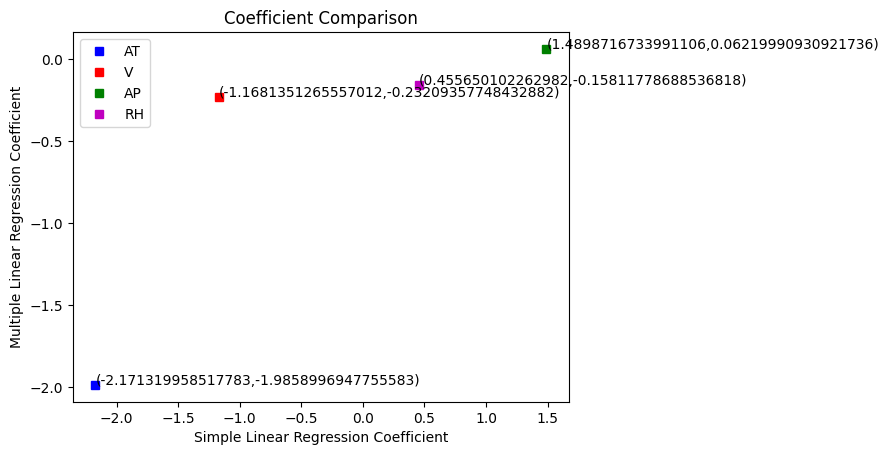

In [24]:
print("1 C results", lr_coeff)
print("1 D result ", mul_reg_coeff)

x_points = []
y_points = []
colors = ['bs', 'rs', 'gs', 'ms']
plt.title("Coefficient Comparison")
i = 0
for f in lr_coeff:
    plt.plot(lr_coeff[f], mul_reg_coeff[f], colors[i] , label = f)
    plt.annotate("(" + str(lr_coeff[f])+","+str(mul_reg_coeff[f])+")", xy = (lr_coeff[f], mul_reg_coeff[f]))
    i+=1
plt.legend()
plt.xlabel("Simple Linear Regression Coefficient")
plt.ylabel("Multiple Linear Regression Coefficient")

<b> (f) Is there evidence of nonlinear association between any of the predictors and the
response? To answer this question, for each predictor
X
, fit a model of the form
Y
=
β
0
+
β
1
X
+
β
2
X
2
+
β
3
X
3
+e</b>

In [25]:
def polynomial_regression(feature):
    """"
    Performs Polynomial Regression for 'feature' predictor predicting 'PE'
    Parameters : feature (Predictor for polynomial regression)
    Return : -
    """
    print("Polynomial regression started for feature ===> ", feature)
    poly_x = data[feature].values
    poly_x = poly_x.reshape(-1,1)
    poly_y = data['PE'].values
    poly_y = poly_y.reshape(-1,1)
    
    poly_regression = PolynomialFeatures(degree = 3)
    
    poly_x1 = poly_regression.fit_transform(poly_x)
    poly_regression.fit(poly_x1, poly_y)
    
    lin_reg = LinearRegression()
    lin_reg.fit(poly_x1, poly_y)
    print("Coefficients ==> ", lin_reg.coef_)
    print("Intercept ==> ", lin_reg.intercept_)
        
    multi_x = np.column_stack((poly_x, poly_x**2, poly_x**3))
    multi_x = sm.add_constant(multi_x)
    stats_poly_model = sm.OLS(poly_y, multi_x).fit()
    print(stats_poly_model.summary())
    print("\n\n")

In [26]:
for pds in var[:-1]:
    polynomial_regression(pds)

Polynomial regression started for feature ===>  AT
Coefficients ==>  [[ 0.         -0.61034571 -0.12513818  0.00267485]]
Intercept ==>  [492.72814334]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:48:55   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|     

In [27]:
print("After Observing the Stats")
print("We can conclude V**2 and V**3 are not statistically significant as their p-values > 0.05")
print("All other predictors show non-linear association with response")

After Observing the Stats
We can conclude V**2 and V**3 are not statistically significant as their p-values > 0.05
All other predictors show non-linear association with response


<b> (g) Is there evidence of association of interactions of predictors with the response? To
answer this question, run a full linear regression model with all pairwise interaction
terms and state whether any interaction terms are statistically significant </b>

In [28]:
def pairwise_interaction():
    """
    Performs Linear Regression with predictors having all the interaction terms
    Parameters : -
    Return : -
    """
    all_combinations = []
    all_combinations.append(data[var[:-1]])
        
    for x in range(len(var[:-1])-1):
        for y in range(x+1, len(var[:-1])):
            ft1 = var[x]
            ft2 = var[y]
            x_part1 = data[ft1].values
            x_part2 = data[ft2].values

            pair_x = [x_part1[it] * x_part2[it] for it in range(len(x_part1))]
            new_df = pd.DataFrame(pair_x, columns=[ft1+"*"+ft2])
            all_combinations.append(new_df)
            
    pairwise_x = pd.concat(all_combinations, axis = 1)
    pairwise_y = data['PE'].values
    
    pairwise_x = sm.add_constant(pairwise_x)
    pairwise_model = sm.OLS(pairwise_y, pairwise_x).fit()
    
    print(pairwise_model.summary())

In [29]:
pairwise_interaction()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:48:56   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

In [30]:
print("From observing the above stats")
print("AT*V, AT*RH, V*AP are statistically significant intercation pairs as their p-values < 0.05")

From observing the above stats
AT*V, AT*RH, V*AP are statistically significant intercation pairs as their p-values < 0.05


<b> (h) Can you improve your model using possible interaction terms or nonlinear asso-
ciations between the predictors and response? Train the regression model on a
randomly selected 70% subset of the data with all predictors. Also, run a regres-
sion model involving all possible interaction terms and quadratic nonlinearities,
and remove insignificant variables using p-values (be careful about interaction
terms). Test both models on the remaining points and report your train and test
MSEs. </b>

In [31]:
def run_linear_regression_model():
    """
    Performs Linear Regression Considering all linear terms
    Parameters : -
    Return : -
    """
    X1 = data[var[:-1]]
    Y1 = data['PE']
    x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, Y1, random_state = 42, test_size = 0.3)
    
    print("Train Data Shape ==> ", x_train1.shape)
    print("Test Data Shape ==> ", x_test1.shape)
    
    lr1 = LinearRegression()
    lr1_model = lr1.fit(x_train1, y_train1)
    
    predicted_train_y1 = lr1_model.predict(x_train1)
    predicted_test_y1 = lr1_model.predict(x_test1)
    
    mse_train1 = mean_squared_error(predicted_train_y1, y_train1)
    mse_test1 = mean_squared_error(predicted_test_y1, y_test1)
    
    stats_x_train1 = sm.add_constant(x_train1)
    lr2 = sm.OLS(y_train1, stats_x_train1).fit()
    print(lr2.summary())
    print("\n")
    print("Train MSE ==> ", mse_train1)
    print("Test MSE ==> ", mse_test1)

In [32]:
run_linear_regression_model()

Train Data Shape ==>  (6697, 4)
Test Data Shape ==>  (2871, 4)
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.194e+04
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:48:56   Log-Likelihood:                -19630.
No. Observations:                6697   AIC:                         3.927e+04
Df Residuals:                    6692   BIC:                         3.930e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [33]:
def run_regression_quadratic_model():
    """
    Performs Linear Regression Considering interaction terms and quadratic terms
    Parameters : -
    Return : -
    """
    all_terms_data = []
    all_terms_data.append(data[var[:-1]])  ## AT, V, AP, RH
    
    ## adding all interaction terms 
    for x in range(len(var[:-1])-1):
        for y in range(x+1, len(var[:-1])):
            ft1 = var[x]
            ft2 = var[y]
            x_part1 = data[ft1].values
            x_part2 = data[ft2].values

            pair_x = [x_part1[it] * x_part2[it] for it in range(len(x_part1))]
            new_df = pd.DataFrame(pair_x, columns=[ft1+"*"+ft2])
            all_terms_data.append(new_df)
            
            
    ## adding all quadratic terms
    for x in var[:-1]:
        x_single = data[x].values
        
        quadratic_x = [it*it for it in x_single]
        new_df = pd.DataFrame(quadratic_x, columns=[x+"**2"])
        all_terms_data.append(new_df)
        
    quad_df = pd.concat(all_terms_data, axis = 1)
    expected_y = data["PE"]
    
    x_train2, x_test2, y_train2, y_test2 = train_test_split(quad_df, expected_y, random_state = 42, test_size = 0.3)
    print("Train Data Shape ==> ", x_train2.shape)
    print("Test Data Shape ==> ", x_test2.shape)
    
    lr2 = LinearRegression()
    lr2_model = lr2.fit(x_train2, y_train2)
    
    predicted_train_y2 = lr2_model.predict(x_train2)
    predicted_test_y2 = lr2_model.predict(x_test2)
    
    mse_train2 = mean_squared_error(predicted_train_y2, y_train2)
    mse_test2 = mean_squared_error(predicted_test_y2, y_test2)
    
    stats_x_train2 = sm.add_constant(x_train2)
    lr2_2 = sm.OLS(y_train2, stats_x_train2).fit()
    print(lr2_2.summary())
    print("\n")
    print("Train MSE ==> ", mse_train2)
    print("Test MSE ==> ", mse_test2)
    print(x_train2.columns)

In [34]:
run_regression_quadratic_model()

Train Data Shape ==>  (6697, 14)
Test Data Shape ==>  (2871, 14)
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7272.
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:48:56   Log-Likelihood:                -19160.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6682   BIC:                         3.845e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

In [35]:
print("From the above observation")
print("V, AT*AP, V*AP, V*RH, V**2 have p > 0.05 hence they are statistically insignificant")

From the above observation
V, AT*AP, V*AP, V*RH, V**2 have p > 0.05 hence they are statistically insignificant


In [36]:
def run_final_regression():
    """
    Performs Linear Regression using combination of best predictors from the above analysis
    Parameters : -
    Return : lr3_model_acc (Model Accuracy)
    """
    insig = ["V", "AT*AP", "V*AP", "V*RH", "V**2"] ## <== Insignificant features
    all_terms_data1 = []
    temps = []
    for x in var[:-1]:
        if x not in insig:
            temps.append(x)
    all_terms_data1.append(data[temps]) 
    
    ## adding all interaction terms 
    for x in range(len(var[:-1])-1):
        for y in range(x+1, len(var[:-1])):
            ft1 = var[x]
            ft2 = var[y]
            combination = ft1+"*"+ft2
            if combination not in insig:
                x_part1 = data[ft1].values
                x_part2 = data[ft2].values

                pair_x = [x_part1[it] * x_part2[it] for it in range(len(x_part1))]
                new_df = pd.DataFrame(pair_x, columns=[ft1+"*"+ft2])
                all_terms_data1.append(new_df)
            
            
    ## adding all quadratic terms
    for x in var[:-1]:
        combination = x+"**2"
        if combination not in insig:
            x_single = data[x].values
            quadratic_x = [it*it for it in x_single]
            new_df = pd.DataFrame(quadratic_x, columns=[x+"**2"])
            all_terms_data1.append(new_df)
        
    quad_df1 = pd.concat(all_terms_data1, axis = 1)
    expected_y1 = data["PE"]
    
    x_train3, x_test3, y_train3, y_test3 = train_test_split(quad_df1, expected_y1, random_state = 42, test_size = 0.3)
    print("Train Data Shape ==> ", x_train3.shape)
    print("Test Data Shape ==> ", x_test3.shape)
    
    lr3 = LinearRegression()
    lr3_model = lr3.fit(x_train3, y_train3)
    
    predicted_train_y3 = lr3_model.predict(x_train3)
    predicted_test_y3 = lr3_model.predict(x_test3)
    
    mse_train3 = mean_squared_error(predicted_train_y3, y_train3)
    mse_test3 = mean_squared_error(predicted_test_y3, y_test3)
    
    stats_x_train3 = sm.add_constant(x_train3)
    lr3 = sm.OLS(y_train3, stats_x_train3).fit()
    print(lr3.summary())
    print("\n")
    print("Train MSE ==> ", mse_train3)
    print("Test MSE ==> ", mse_test3)
    
    lr3_model_acc = lr3_model.score(x_test3, y_test3)
    return lr3_model_acc

In [37]:
final_model_acc = run_final_regression()

Train Data Shape ==>  (6697, 9)
Test Data Shape ==>  (2871, 9)
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.095e+04
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:48:56   Log-Likelihood:                -19265.
No. Observations:                6697   AIC:                         3.855e+04
Df Residuals:                    6687   BIC:                         3.862e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

<b> 1.(i).i KNN Regression: Perform
k
-nearest neighbor regression for this dataset using both normalized
and raw features. Find the value of
k
∈ {
1
,
2
, . . . ,
100
}
that gives you the
best fit. Plot the train and test errors in terms of 1
/k
</b>

In [38]:
def normalization(df):
    """
    Normalized the input dataframe
    Parameters : df (Input Data)
    Return : normalized_df (Normalized Data)
    """
    normalized_df = preprocessing.normalize(df)
    normalized_df = pd.DataFrame(normalized_df)
    normalized_df.columns = df.columns
    return normalized_df

In [39]:
def find_best_k(arr):
    """
    Find the Best K, comparing the test errors
    Parameters : arr (where arr[0] is of form [kval, train_error, test_error])
    Return : best_k (K for which the test error is lowest)
             lowest_test_error (lowest test error)
    """
    best_k = -1
    lowest_test_error = float('inf')
    
    for kval, trainerror, testerror in arr:
        if testerror < lowest_test_error:
            lowest_test_error = testerror
            best_k = kval
            
    return best_k, lowest_test_error

In [40]:
def raw_knn():
    """
    Performs KNN regression on the raw dataset
    Parameters : -
    Return : [k_value, train_error, test_error] for all k in [1,100]
    """
    answers = []
    knn_x = data[var[:-1]]
    knn_y = data["PE"]
    knn_train_x1, knn_test_x1, knn_train_y1, knn_test_y1 = train_test_split(knn_x, knn_y, random_state=42, test_size = 0.3)
    for k_val in range(1,101,1):
        knn = KNeighborsRegressor(n_neighbors = k_val)
        knn.fit(knn_train_x1, knn_train_y1)
        
        train_y_knn_prediction = knn.predict(knn_train_x1)
        test_y_knn_prediction = knn.predict(knn_test_x1)
        
        train_acc = knn.score(knn_train_x1, knn_train_y1)
        test_acc = knn.score(knn_test_x1, knn_test_y1)
        
        train_error = 1 - train_acc
        test_error = 1 - test_acc
        
        answers.append([k_val,train_error, test_error])
    
    xvals = [1/it for it in range(1,101,1)]
    plt.title("Train vs Test Error compared to Raw 1/k")
    plt.plot(xvals, [x[1] for x in answers], color='green', label='train error')
    plt.plot(xvals, [x[2] for x in answers], color='blue', label='test error')
    plt.legend()
    plt.xlabel("1/K")
    plt.ylabel("Error")
    return answers
    

In [41]:
def normalized_knn():
    """
    Performs KNN regression on the Normalized dataset
    Parameters : -
    Return : [k_value, train_error, test_error] for all k in [1,100]
    """
    normalized_data = normalization(data)
    answers = []
    knn_x = normalized_data[var[:-1]]
    knn_y = normalized_data["PE"]
    knn_train_x1, knn_test_x1, knn_train_y1, knn_test_y1 = train_test_split(knn_x, knn_y, random_state=42, test_size = 0.3)
    for k_val in range(1,101,1):
        knn = KNeighborsRegressor(n_neighbors = k_val)
        knn.fit(knn_train_x1, knn_train_y1)
        
        train_y_knn_prediction = knn.predict(knn_train_x1)
        test_y_knn_prediction = knn.predict(knn_test_x1)
        
        train_acc = knn.score(knn_train_x1, knn_train_y1)
        test_acc = knn.score(knn_test_x1, knn_test_y1)
        
        train_error = 1 - train_acc
        test_error = 1 - test_acc
        
        answers.append([k_val,train_error, test_error])
    
    xvals = [1/it for it in range(1,101,1)]
    plt.title("Train vs Test Error compared to Normalized 1/k")
    plt.plot(xvals, [x[1] for x in answers], color='green', label='train error')
    plt.plot(xvals, [x[2] for x in answers], color='blue', label='test error')
    plt.legend()
    plt.xlabel("1/K")
    plt.ylabel("Error")
    return answers

Best Raw K ==>  5
Lowest Test Error for Best Raw K ==>  5.364592369711795 %


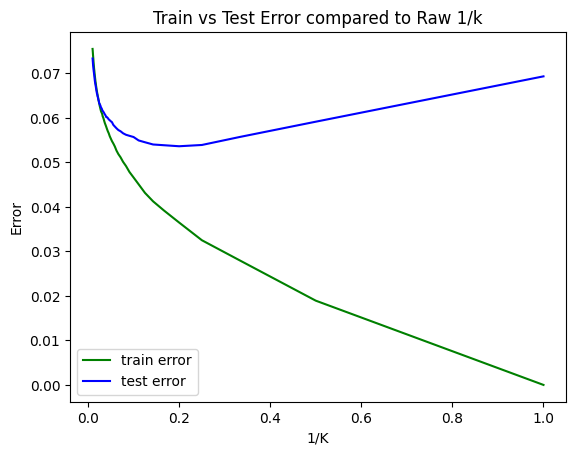

In [42]:
raw_knn_ans = raw_knn()
best_raw_k, best_raw_test_error = find_best_k(raw_knn_ans)
print("Best Raw K ==> ", best_raw_k)
print("Lowest Test Error for Best Raw K ==> ", best_raw_test_error*100, "%")

Best Normalized K ==>  3
Lowest Test Error for Best Normalized K ==>  1.027370619043455 %


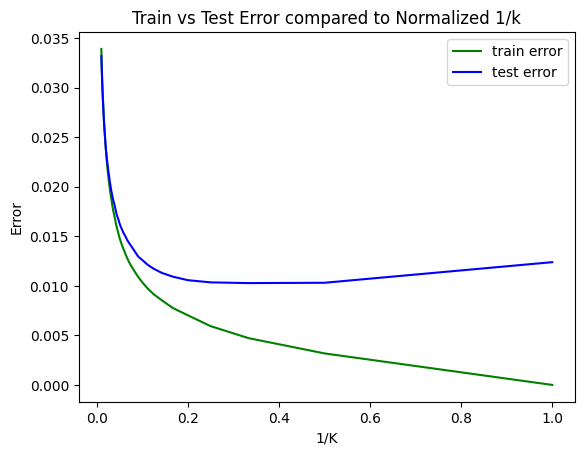

In [43]:
normalized_knn_ans = normalized_knn()
best_normalized_k, best_normalized_test_error = find_best_k(normalized_knn_ans)
print("Best Normalized K ==> ", best_normalized_k)
print("Lowest Test Error for Best Normalized K ==> ", best_normalized_test_error*100, "%")

<b> 1.(j) Compare the results of KNN Regression with the linear regression model that has
the smallest test error and provide your analysis </b>

In [44]:
final_linear_model_test_acc = final_model_acc * 100
final_linear_mdoel_test_error = 100 - final_linear_model_test_acc

normalized_knn_test_error =  best_normalized_test_error*100
normalized_knn_test_acc = 100 - normalized_knn_test_error


print("Best Test Accuracy for Linear Model ==> ", final_linear_model_test_acc, "%")
print("Lowest Test Error for Linear Model ==> ",final_linear_mdoel_test_error, "%")
print("===========================================================================")
print("Best Test Accuracy for Normalized KNN ==> ",normalized_knn_test_acc, "%")
print("Lowest Test Error for Normalized KNN ==> ", normalized_knn_test_error, "%")

Best Test Accuracy for Linear Model ==>  93.44349762660109 %
Lowest Test Error for Linear Model ==>  6.556502373398914 %
Best Test Accuracy for Normalized KNN ==>  98.97262938095655 %
Lowest Test Error for Normalized KNN ==>  1.027370619043455 %


In [45]:
print("From the Above result it is safe to conclude that KNN Linear Regression is better")

From the Above result it is safe to conclude that KNN Linear Regression is better
